# PRETRAINED NET WITH TF-SLIM

In [1]:
import urllib, os
import tarfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread, imresize
import tensorflow as tf
import tensorflow.contrib.slim as slim
from tensorflow.contrib.slim.nets import resnet_v1
%matplotlib inline  
print ("PACKAGES LOADED")

PACKAGES LOADED


## DOWNLOAD PRETRAINED NET

In [2]:
# MAKE PATH IF NECESSARY 
dirpath = "data/"
if not os.path.exists(dirpath):
    os.makedirs(dirpath)
# DOWNLOAD 
urlpath = "http://download.tensorflow.org/models/resnet_v1_50_2016_08_28.tar.gz"
zname   = "data/resnet_v1_50_2016_08_28.tar.gz"
if not os.path.exists(zname):
    print ("DOWNLOADING %s..." % (zname))
    urllib.urlretrieve(urlpath, zname)
    print ("DONE")
else:
    print ("%s ALREADY EXISTS" % (zname))

data/resnet_v1_50_2016_08_28.tar.gz ALREADY EXISTS


## UNZIP CKPT

In [3]:
fname = "data/resnet_v1_50_2016_08_28"
if not os.path.exists(fname):
    print ("EXTRACTING %s..." % (fname))
    tar = tarfile.open(zname, "r:gz")
    tar.extractall(path=fname)
    tar.close()
    print ("DONE.")
else:
    print ("%s ALREADY EXIST" % (fname))

data/resnet_v1_50_2016_08_28 ALREADY EXIST


## OPEN SESSION

In [4]:
sess = tf.Session()

## MODEL

In [5]:
x = tf.placeholder(shape=[None, 224, 224, 3], dtype=tf.float32)
with slim.arg_scope(resnet_v1.resnet_arg_scope()):
    mean = tf.constant([123.68, 116.779, 103.939],
        dtype=tf.float32, shape=[1, 1, 1, 3], name='img_mean')
    im_centered = x - mean
    net, end_points = resnet_v1.resnet_v1_50(inputs=im_centered, num_classes=1000)
    b1 = end_points['resnet_v1_50/block1']

## RESTORE

In [6]:
variables_to_restore = slim.get_variables_to_restore(include=["resnet_v1"])
restorer = tf.train.Saver(variables_to_restore)
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())
restorer.restore(sess, fname+"/resnet_v1_50.ckpt") 

## RUN

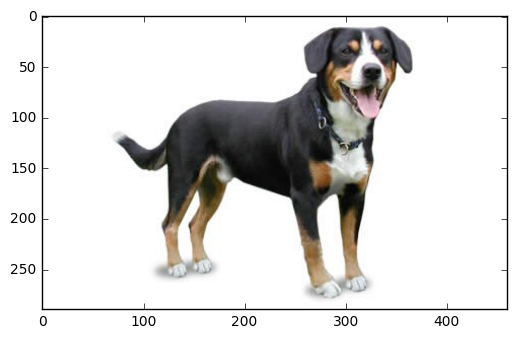

In [7]:
currimg  = imread("data/dog.jpg")
rszimg   = imresize(currimg, [224, 224])
rszimg   = rszimg.reshape([1, 224, 224, 3])
b1_out   = sess.run(b1, feed_dict={x: rszimg})
net_out  = sess.run(net, feed_dict={x: rszimg})
plt.imshow(currimg)

## IMAGENET INDEX->LABEL

In [8]:
from six.moves import urllib
base_url = 'https://raw.githubusercontent.com/tensorflow/models/master/inception/inception/data/'
synset_url = '{}/imagenet_lsvrc_2015_synsets.txt'.format(base_url)
synset_to_human_url = '{}/imagenet_metadata.txt'.format(base_url)
filename, _ = urllib.request.urlretrieve(synset_url)
synset_list = [s.strip() for s in open(filename).readlines()]
num_synsets_in_ilsvrc = len(synset_list)
assert num_synsets_in_ilsvrc == 1000
filename, _ = urllib.request.urlretrieve(synset_to_human_url)
synset_to_human_list = open(filename).readlines()
num_synsets_in_all_imagenet = len(synset_to_human_list)
assert num_synsets_in_all_imagenet == 21842
synset_to_human = {}
for s in synset_to_human_list:
    parts = s.strip().split('\t')
    assert len(parts) == 2
    synset = parts[0]
    human = parts[1]
    synset_to_human[synset] = human

label_index = 1
labels_to_names = {0: 'background'}
for synset in synset_list:
    name = synset_to_human[synset]
    labels_to_names[label_index] = name
    label_index += 1

In [9]:
print b1_out.shape
print net_out.shape
k = 5
top_k = net_out[0, 0, 0, :].argsort()[-k:][::-1]
print top_k
for idx in top_k:
    print labels_to_names[idx+1]

(1, 28, 28, 256)
(1, 1, 1, 1000)
[676 852 151 234 208]
muzzle
tennis ball
Chihuahua
Rottweiler
Labrador retriever
